In [1]:
# load the iris dataset 
from __future__ import print_function
from sklearn.datasets import load_iris

dataset = load_iris()

data = dataset['data']
label = dataset['target']

data = data[label<2,2:4]
label = label[label<2]

data_c0_d0 = data[label==0,0]
data_c0_d1 = data[label==0,1]
data_c1_d0 = data[label==1,0]
data_c1_d1 = data[label==1,1]

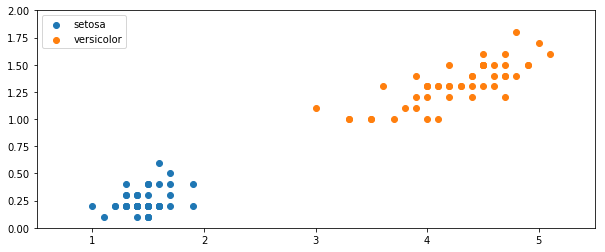

In [2]:
# visualize the dataset
from matplotlib import pyplot as plt

%matplotlib inline
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(data_c0_d0, data_c0_d1, label='setosa')
ax.scatter(data_c1_d0, data_c1_d1, label='versicolor')

ax.set_xlim([0.5,5.5])
ax.set_ylim([0,2])
ax.legend()
plt.close('all')
fig

In [3]:
# Perceptron Inplementation
import numpy as np

class perceptron():
    def fit(self, X, Y, eta, epochs, seed=10):
        np.random.seed(seed)
        w = np.random.rand(len(X[0]))
        b = 0
        iteration = [(w,b)]

        Y_ = 2*Y-1
        for t in range(epochs):
            for i, x in enumerate(X):
                if (np.dot(X[i], w)+b) * Y_[i] <= 0:
                    w = w + eta*X[i]*Y_[i]
                    b = b + eta*Y_[i]
                    iteration.append((w,b))
                
        self.w = w
        self.b = b
        self.iteration = iteration

In [4]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

epoch = widgets.IntSlider(description='epoch:', min=1, max=20, value=5)
display(epoch)

lr = widgets.FloatSlider(description='log lr:', min=-2, max=1, value=-1)
display(lr)

seed = widgets.IntSlider(description='seed:', min=1, max=100000, value=15)
display(seed)


IntSlider(value=5, description=u'epoch:', max=20, min=1)

FloatSlider(value=-1.0, description=u'log lr:', max=1.0, min=-2.0)

IntSlider(value=15, description=u'seed:', max=100000, min=1)

In [5]:
# Train an percrptron

percep = perceptron()

print('Training perceptron {} epochs with learning rate {}'.format(epoch.value, 10**lr.value))
percep.fit(data, label, 10**lr.value, epoch.value, seed.value)

print('The function of the perceptron classifier is {}*x + {}*y = {}'.format(percep.w[0],percep.w[1], -percep.b))

Training perceptron 5 epochs with learning rate 0.1
The function of the perceptron classifier is 0.148817697269*x + 0.078895924921*y = 0.5


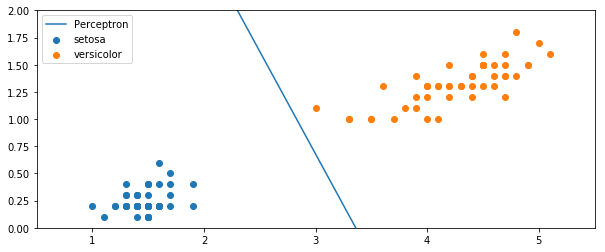

In [6]:
# visualize the perceptron

xx = np.linspace(-5,10,100)

k = - percep.w[0]/percep.w[1]
b = - percep.b/percep.w[1]
yy = k*xx+b

ax.plot(xx,yy,label="Perceptron")
ax.legend()
plt.close('all')
fig

In [7]:
# replay the animation of perceptron
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

fig2, ax2 = plt.subplots(figsize=(10,4))
ax2.scatter(data_c0_d0, data_c0_d1, label='setosa')
ax2.scatter(data_c1_d0, data_c1_d1, label='versicolor')

per_plot, = ax2.plot(xx,yy,color='y',label="Perceptron")

ax2.set_xlim([-2,8])
ax2.set_ylim([-1,3])

plt.close('all')

def per_animate(i):
    k = - percep.iteration[i][0][0]/percep.iteration[i][0][1]
    b = - percep.iteration[i][1]/percep.iteration[i][0][1]
    yy = k*xx+b
    per_plot.set_data(xx, yy)

ani = matplotlib.animation.FuncAnimation(fig2, per_animate, frames=len(percep.iteration), interval=1000, repeat=False)

from IPython.display import HTML
HTML(ani.to_jshtml())

In [8]:
# Train an SVM classifier
from sklearn.svm import LinearSVC
import numpy as np

svm = LinearSVC()
svm.fit(data, label)

print('The function of the SVM classifier is {}*x + {}*y = {}'.format(svm.coef_[0][0],svm.coef_[0][1], -svm.intercept_[0]))

The function of the SVM classifier is 0.615695099308*x + 0.810215254466*y = 2.12827250969


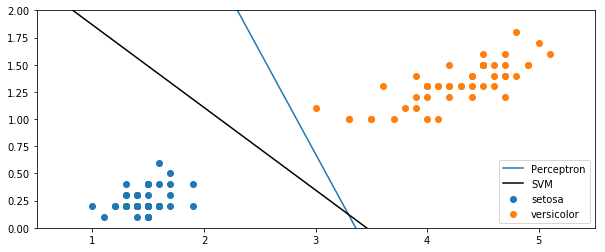

In [9]:
# Visualize the SVM classifier

k = - svm.coef_[0][0]/svm.coef_[0][1]
b = - svm.intercept_[0]/svm.coef_[0][1]

xx = np.linspace(0,4,100)
yy = k*xx+b

plt.ion()
ax.plot(xx,yy,color='k',label="SVM")
ax.legend()
ax.set_xlim([0.5,5.5])
ax.set_ylim([0,2])
plt.close('all')
fig